## Import modules

In [2]:
!git clone https://github.com/mindee/doctr.git # clone the repository

Cloning into 'doctr'...
remote: Enumerating objects: 9449, done.
remote: Counting objects: 100% (2964/2964), done.
remote: Compressing objects: 100% (1160/1160), done.
remote: Total 9449 (delta 2137), reused 2312 (delta 1712), pack-reused 6485
Receiving objects: 100% (9449/9449), 9.50 MiB | 24.38 MiB/s, done.
Resolving deltas: 100% (6238/6238), done.


In [3]:
!pip install -q tensorflow-addons # Isntall tensorflow addon dependency

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [4]:
!pip install -qe doctr/. # Install doctr

     |████████████████████████████████| 49.9 MB 14 kB/s 
     |████████████████████████████████| 6.4 MB 40.9 MB/s 
     |████████████████████████████████| 123 kB 60.2 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 365 kB 38.7 MB/s 
     |████████████████████████████████| 241 kB 43.4 MB/s 
     |████████████████████████████████| 3.0 MB 40.5 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 70 kB 6.8 MB/s 
     |████████████████████████████████| 2.0 MB 50.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
from doctr.io import DocumentFile # for converting docs to 3-D vectors
from doctr.models import ocr_predictor

## Doctr model

In [3]:
model = ocr_predictor(pretrained= True)

  0%|          | 0/94178964 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [28]:
document = DocumentFile.from_images('image2.jpeg') # Covert the image into vectors
print(document[0].shape)
result = model(document)
print(result)

(555, 1338, 3)
Document(
  (pages): [Page(
    dimensions=(555, 1338)
    (blocks): [Block(
      (lines): [Line(
        (words): [
          Word(value='-', confidence=0.98),
          Word(value='-', confidence=0.95),
          Word(value='FDlinIndia-', confidence=0.6),
          Word(value='from', confidence=0.84),
          Word(value='2000to2016', confidence=0.76),
          Word(value='Journey', confidence=0.99),
          Word(value='-', confidence=0.99),
          Word(value='Thank', confidence=0.82),
          Word(value='You', confidence=0.99),
          Word(value='AnyQuestions', confidence=0.86),
          Word(value='Please..!!', confidence=0.53),
        ]
      )]
      (artefacts): []
    )]
  )]
)


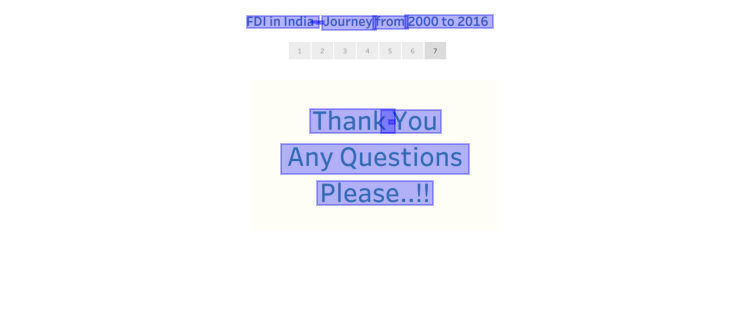

In [21]:
result.show(document)

In [22]:
result_json = result.export()
result_json

{'pages': [{'blocks': [{'artefacts': [],
     'geometry': ((0.33203125, 0.0263671875), (0.673828125, 0.6630859375)),
     'lines': [{'geometry': ((0.33203125, 0.0263671875),
        (0.673828125, 0.6630859375)),
       'words': [{'confidence': 0.9816014170646667,
         'geometry': ((0.4208984375, 0.0458984375),
          (0.4287109375, 0.0537109375)),
         'value': '-'},
        {'confidence': 0.9535748958587646,
         'geometry': ((0.4296875, 0.044921875), (0.439453125, 0.0556640625)),
         'value': '-'},
        {'confidence': 0.5954161882400513,
         'geometry': ((0.33203125, 0.0283203125),
          (0.4326171875, 0.0673828125)),
         'value': 'FDlinIndia-'},
        {'confidence': 0.843623697757721,
         'geometry': ((0.5078125, 0.02734375), (0.556640625, 0.0712890625)),
         'value': 'from'},
        {'confidence': 0.7584356069564819,
         'geometry': ((0.552734375, 0.0263671875), (0.673828125, 0.0703125)),
         'value': '2000to2016'},
      

## Cleaned result

In [64]:
import re
to_extract = re.compile('[^a-zA-Z0-9]')
word_list = result_json['pages'][0]['blocks'][0]['lines'][0]['words']
words = [word['value'] for word in word_list]
confidence = [word['confidence'] for word in word_list]
descriptions = list(zip(words,confidence))
for item in descriptions:
  print(f'word : {item[0]}  confidence : {item[1]}')
text = ' '.join(words).lower()
text = to_extract.sub(' ',text).strip()
print('\n\n','text ->',text)

word : -  confidence : 0.9816014170646667
word : -  confidence : 0.9535748958587646
word : FDlinIndia-  confidence : 0.5954161882400513
word : from  confidence : 0.843623697757721
word : 2000to2016  confidence : 0.7584356069564819
word : Journey  confidence : 0.9870968461036682
word : -  confidence : 0.9889936447143555
word : Thank  confidence : 0.8199373483657837
word : You  confidence : 0.9892237782478333
word : AnyQuestions  confidence : 0.8622943758964539
word : Please..!!  confidence : 0.5318099856376648


 text -> fdlinindia  from 2000to2016 journey   thank you anyquestions please


Observation : 2000to2016 & AnyQuestions was not seprately identified